# Document Loading

## 검색 증강 생성 (Retrieval augmented generation)

검색 증강 생성(RAG)에서 LLM은 실행의 일부로 외부 데이터 세트에서 컨텍스트 문서를 검색합니다.이 기능은 특정 문서(예: PDF, 동영상 세트 등)에 대해 질문할 때 유용합니다.

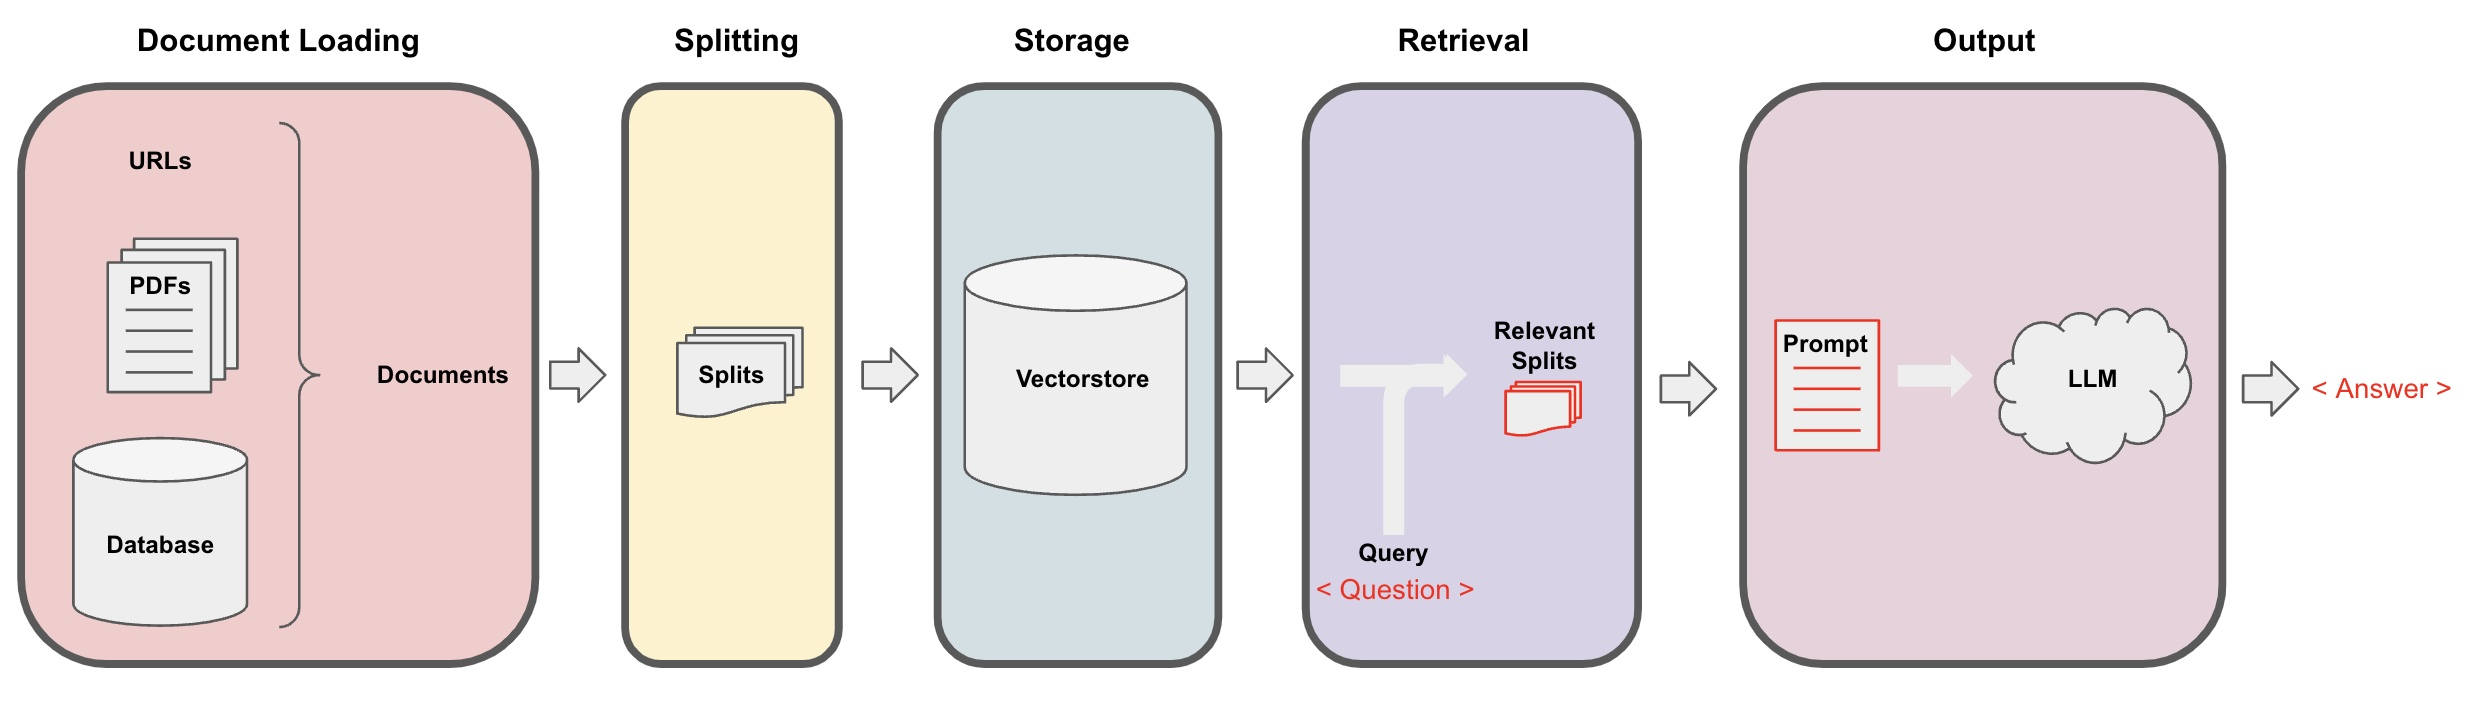

In [1]:
#! pip install langchain

In [2]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

## PDF
Andrew Ng의 유명한 CS229 강좌의 [PDF 필사본](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture01.pdf)을 로드해보겠습니다. 이 문서는 자동화된 필사본의 결과이므로 단어와 문장이 예기치 않게 분리되는 경우가 있습니다.

In [3]:
# The course will show the pip installs you would need to install packages on your own machine.
# These packages are already installed on this platform and should not be run again.
# ! pip install pypdf 

In [4]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [5]:
len(pages)

22

In [19]:
pages

[Document(page_content='MachineLearning-Lecture01  \nInstructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is ju st spend a little time going over the logistics \nof the class, and then we\'ll start to  talk a bit about machine learning.  \nBy way of introduction, my name\'s  Andrew Ng and I\'ll be instru ctor for this class. And so \nI personally work in machine learning, and I\' ve worked on it for about 15 years now, and \nI actually think that machine learning is th e most exciting field of all the computer \nsciences. So I\'m actually always excited about  teaching this class. Sometimes I actually \nthink that machine learning is not only the most exciting thin g in computer science, but \nthe most exciting thing in all of human e ndeavor, so maybe a little bias there.  \nI also want to introduce the TAs, who are all graduate students doing research in or \nrelated to the machine learni ng and all aspects of machin e 

In [6]:
page = pages[0]

In [20]:
page

Document(page_content='MachineLearning-Lecture01  \nInstructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is ju st spend a little time going over the logistics \nof the class, and then we\'ll start to  talk a bit about machine learning.  \nBy way of introduction, my name\'s  Andrew Ng and I\'ll be instru ctor for this class. And so \nI personally work in machine learning, and I\' ve worked on it for about 15 years now, and \nI actually think that machine learning is th e most exciting field of all the computer \nsciences. So I\'m actually always excited about  teaching this class. Sometimes I actually \nthink that machine learning is not only the most exciting thin g in computer science, but \nthe most exciting thing in all of human e ndeavor, so maybe a little bias there.  \nI also want to introduce the TAs, who are all graduate students doing research in or \nrelated to the machine learni ng and all aspects of machin e l

In [7]:
print(page.page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


In [8]:
page.metadata

{'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

## YouTube

In [9]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [10]:
! pip install yt_dlp
! pip install pydub

**Note**: This can take several minutes to complete.

In [11]:
url="https://www.youtube.com/watch?v=jGwO_UgTS7I"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=jGwO_UgTS7I
[youtube] jGwO_UgTS7I: Downloading webpage
[youtube] jGwO_UgTS7I: Downloading ios player API JSON
[youtube] jGwO_UgTS7I: Downloading android player API JSON
[youtube] jGwO_UgTS7I: Downloading m3u8 information
[info] jGwO_UgTS7I: Downloading 1 format(s): 140
[download] docs/youtube//Stanford CS229： Machine Learning Course, Lecture 1 - Andrew Ng (Autumn 2018).m4a has already been downloaded
[download] 100% of   69.76MiB
[ExtractAudio] Not converting audio docs/youtube//Stanford CS229： Machine Learning Course, Lecture 1 - Andrew Ng (Autumn 2018).m4a; file is already in target format m4a
Transcribing part 1!
Transcribing part 2!
Transcribing part 3!
Transcribing part 4!


In [12]:
docs[0].page_content[0:500]

"Welcome to CS229 Machine Learning. Uh, some of you know that this is a class that's taught at Stanford for a long time. And this is often the class that, um, I most look forward to teaching each year because this is where we've helped, I think, several generations of Stanford students become experts in machine learning, got- built many of their products and services and startups that I'm sure, many of you or probably all of you are using, uh, uh, today. Um, so what I want to do today was spend s"

In [21]:
url="https://youtu.be/I-eHy0fIXIA"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://youtu.be/I-eHy0fIXIA
[youtube] I-eHy0fIXIA: Downloading webpage
[youtube] I-eHy0fIXIA: Downloading ios player API JSON
[youtube] I-eHy0fIXIA: Downloading android player API JSON
[youtube] I-eHy0fIXIA: Downloading player 1dda5629
[youtube] I-eHy0fIXIA: Downloading m3u8 information
[info] I-eHy0fIXIA: Downloading 1 format(s): 140
[download] Destination: docs/youtube//WindowContainer - setWindowTabOrder() ｜ WindowContainer ｜ WebSquare5 - Quick Guide.m4a
[download] 100% of    1.09MiB in 00:00:00 at 6.44MiB/s   
[FixupM4a] Correcting container of "docs/youtube//WindowContainer - setWindowTabOrder() ｜ WindowContainer ｜ WebSquare5 - Quick Guide.m4a"
[ExtractAudio] Not converting audio docs/youtube//WindowContainer - setWindowTabOrder() ｜ WindowContainer ｜ WebSquare5 - Quick Guide.m4a; file is already in target format m4a
Transcribing part 1!
Transcribing part 2!
Transcribing part 3!
Transcribing part 4!
Transcribing part 1!


In [28]:
docs[4]

Document(page_content='웹스퀘어 퀵하이드입니다. 윈도우 컨테이너의 setWindowTabOrder 함수에 대해 알아보겠습니다. 이 함수를 사용하면 네임웨어 상에 표시된 윈도우 탭의 순서를 변경할 수 있습니다. 사용 예의입니다. setWindowTabOrder 함수를 사용하여 윈도우 인덱스가 2, 1, 0인 순서로 윈도우 탭 순서를 변경하는 코드입니다. 예제를 통해 확인해 보겠습니다. 윈도우 컨테이너입니다. 브라우저에서의 모습입니다. 윈도우 컨테이너 상단에는 트리거가 있습니다. 이 트리거를 클릭하면 setWindowTabOrder 함수가 실행되어 윈도우 탭을 인덱스가 2, 1, 그리고 0인 순서로 변경합니다. 브라우저에서 트리거를 클릭하면 윈도우 탭의 순서가 변경됩니다. 다시 시도해 보겠습니다. 윈도우 인덱스 1, 2, 0의 순서로 변경하도록 수정합니다. 저장 후 화면을 다시 로딩합니다. 트리거를 클릭하면 윈도우 인덱스 1, 2, 0의 순서로 윈도우 탭 순서가 변경되는 것을 확인할 수 있습니다. 웹스퀘어 퀵 가이드를 시청해 주셔서 감사합니다.', metadata={'source': 'docs/youtube/WindowContainer - setWindowTabOrder() ｜ WindowContainer ｜ WebSquare5 - Quick Guide.m4a', 'chunk': 0})

## URLs

In [13]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/37signals-is-you.md")

In [14]:
docs = loader.load()

In [15]:
print(docs[0].page_content[:500])













































































handbook/37signals-is-you.md at master · basecamp/handbook · GitHub

















































Skip to content







Toggle navigation










            Sign up
          


 













        Product
        












Actions
        Automate any workflow
      







Packages
        Host and manage packages
      







Security
        Find and fix vulnerabilities
      







Cod


## Notion

Follow steps [here](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) for an example Notion site such as [this one](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f):

* Duplicate the page into your own Notion space and export as `Markdown / CSV`.
* Unzip it and save it as a folder that contains the markdown file for the Notion page.
 

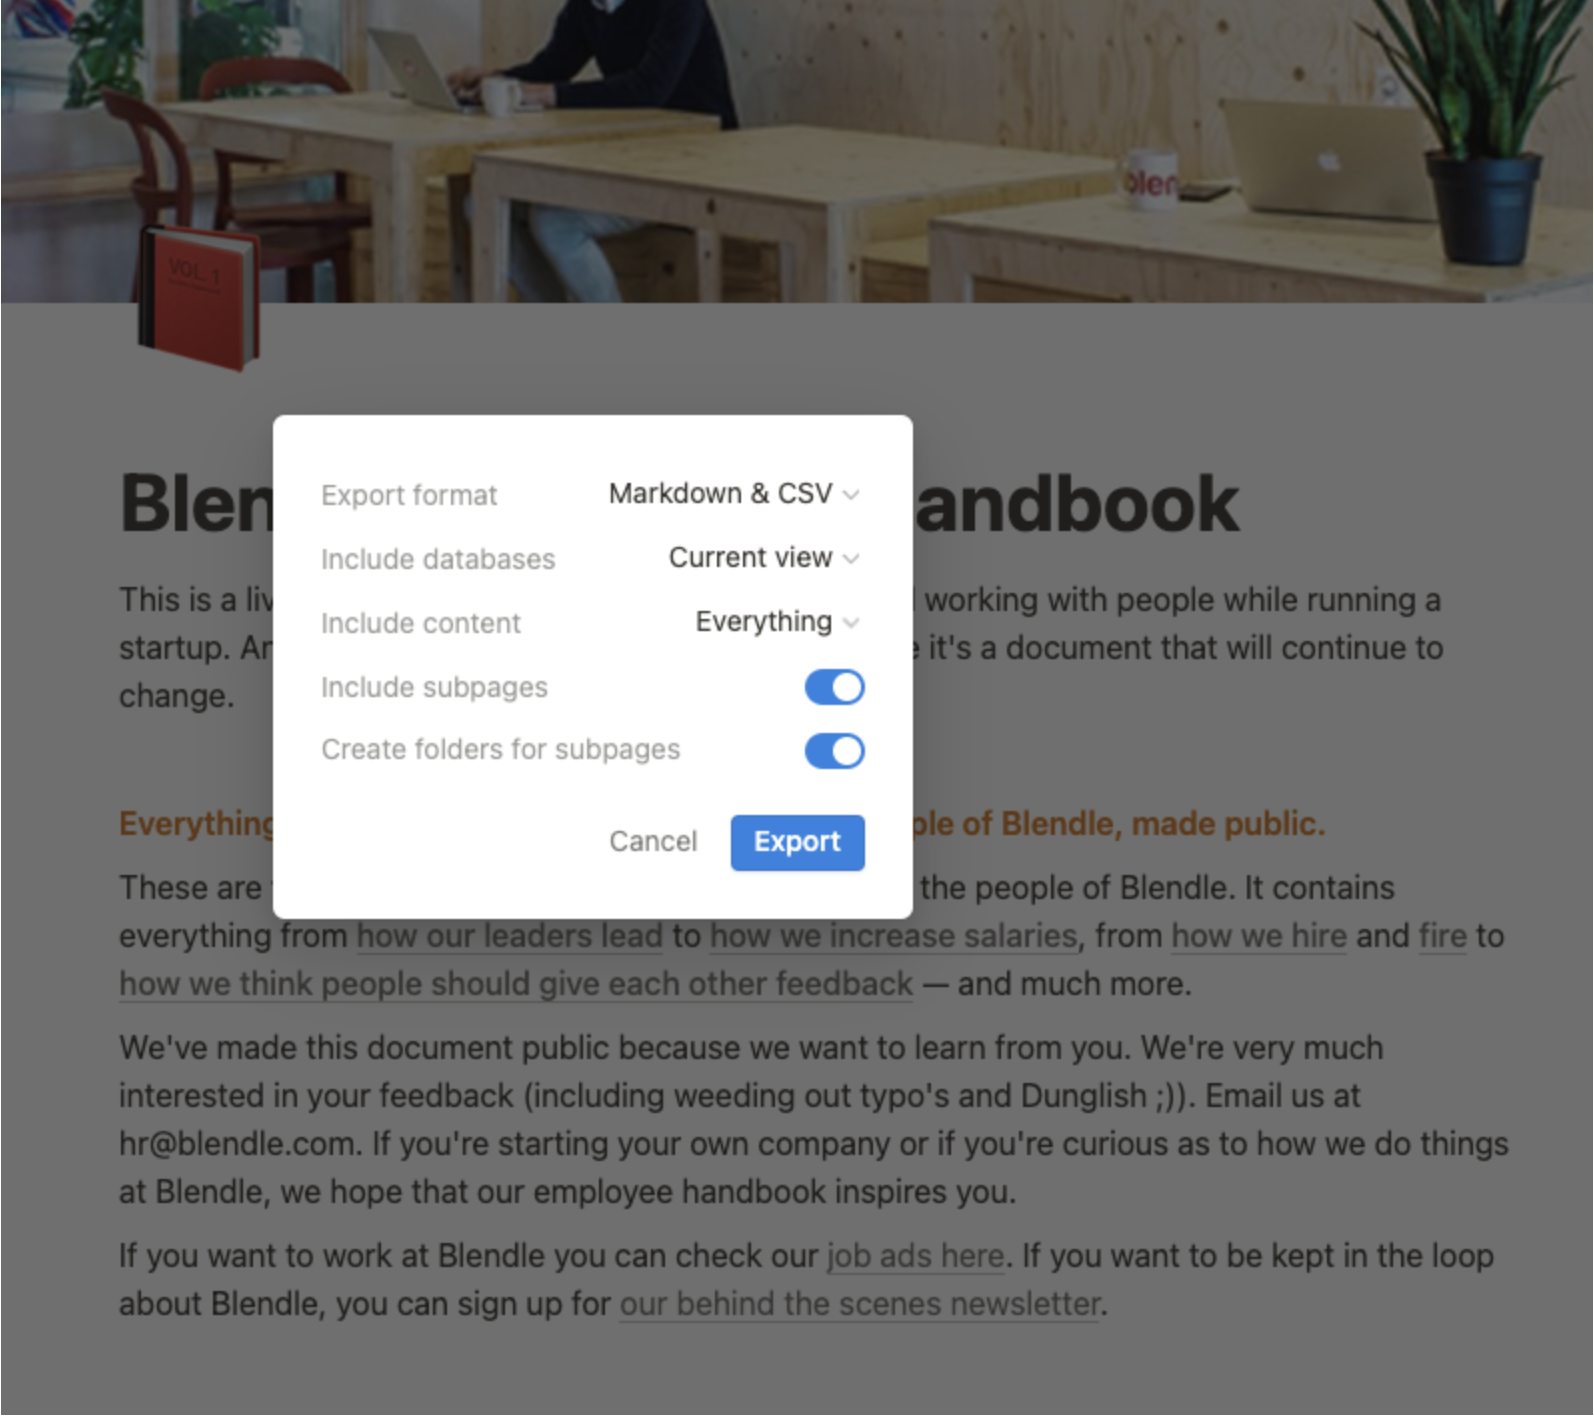

In [16]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()

In [17]:
print(docs[0].page_content[0:200])

# Blendle's Employee Handbook

This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that


In [18]:
docs[0].metadata

{'source': "docs/Notion_DB/Blendle's Employee Handbook 916f149196724008a19e445e268af633.md"}